In [33]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

data.head()

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,prefix,query_prediction,title,tag,label
0,小品,"{""小品大全宋小宝"": ""0.009"", ""小品相亲"": ""0.012"", ""小品剧本"": ...",小品,阅读,0
1,1368,"{""13688cc赛马会"": ""0.059"", ""13685367892"": ""0.124""...",HCG大于1368%2C正常吗,健康,0
2,1368,"{""13688cc赛马会"": ""0.059"", ""13685367892"": ""0.124""...",1368年,百科,1
3,银耳,"{""银耳汤的功效"": ""0.012"", ""银耳为什么不能天天吃"": ""0.009"", ""银耳...",银耳红枣汤的做法,菜谱,1
4,月经量少,"{""月经量少喝红糖水好吗"": ""0.010"", ""月经量少该怎么调理"": ""0.016"", ...",月经量少怎么调理,百科,0


In [24]:
data.shape

(1999999, 5)

In [26]:
temp = data.loc[0]

In [27]:
temp.query_prediction

'{"小品大全宋小宝": "0.009", "小品相亲": "0.012", "小品剧本": "0.020", "小品搞笑大全": "0.066", "小品不差钱": "0.007", "小品搞笑大全剧本": "0.010", "小品大全": "0.198", "小品演员": "0.024", "小品视频": "0.010", "小品大全剧本幽默大全": "0.017"}'

In [28]:
data.tag.unique()

array(['阅读', '健康', '百科', '菜谱', '应用', '经验', '知道', '音乐', '游戏', '网站', '影视',
       '旅游', '快应用', '汽车', '歌手', '网页', '景点', '火车', '商品', '酒店', '航班', '推广',
       '等你花开花又落'], dtype=object)

In [29]:
len(data.tag.unique())

23

In [36]:
import scipy.io
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tag_list = list(data.tag.unique())

bar_count = np.zeros((len(data.tag.unique()),2))

for i in range(0,data.shape[0]):
    t = data.loc[i].tag
    l = data.loc[i].label
    index = tag_list.index(t)
    if l == 0:
        bar_count[index][0] += 1
    else:
        bar_count[index][1] += 1
print(bar_count)

[[  5.38140000e+04   2.45950000e+04]
 [  9.19790000e+04   4.77250000e+04]
 [  4.06528000e+05   3.15568000e+05]
 [  5.20450000e+04   4.33990000e+04]
 [  2.00060000e+05   1.30703000e+05]
 [  6.20990000e+04   6.37080000e+04]
 [  9.19260000e+04   3.97650000e+04]
 [  5.24300000e+04   2.48210000e+04]
 [  6.90500000e+03   6.86600000e+03]
 [  6.91760000e+04   8.35500000e+04]
 [  1.71240000e+04   1.07300000e+04]
 [  1.45170000e+04   3.77800000e+03]
 [  1.94330000e+04   7.72400000e+03]
 [  1.10220000e+04   1.47010000e+04]
 [  1.25580000e+04   2.33500000e+03]
 [  1.22300000e+03   3.27000000e+02]
 [  5.26000000e+03   3.86700000e+03]
 [  3.38000000e+02   8.33000000e+02]
 [  3.66800000e+03   9.13000000e+02]
 [  7.95000000e+02   2.69000000e+02]
 [  6.24000000e+02   2.93000000e+02]
 [  4.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]]


In [37]:
sum(sum(bar_count))

1999999.0

In [38]:
bar_count[22][1]

1.0

In [39]:
bar_count[22][0]

0.0

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['STKAITI'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


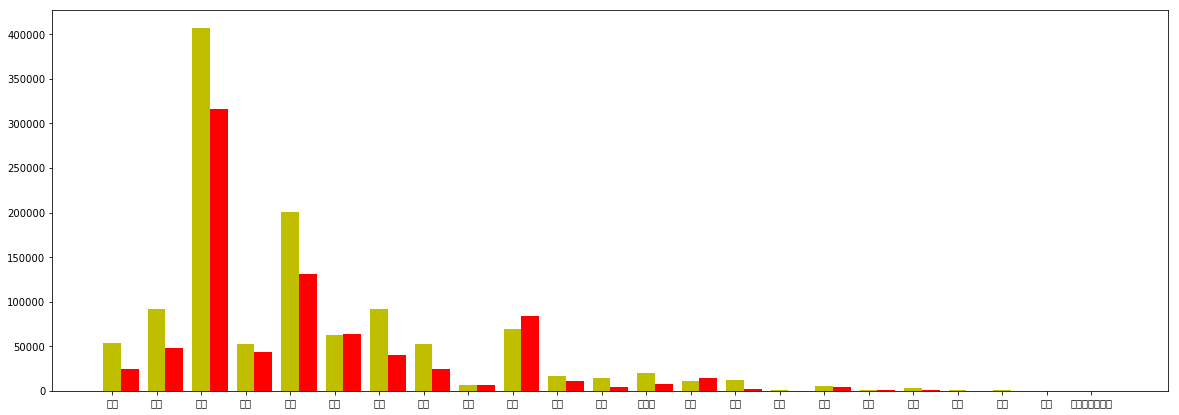

In [57]:
total_width, n = 0.8, 2
width = total_width / n
x=list(range(0,len(data.tag.unique())))

fig = plt.figure(figsize=(20,7))

a=plt.bar(x, bar_count[:,0], width=width, label='0',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
b=plt.bar(x, bar_count[:,1], width=width, label='1',tick_label = tag_list, fc = 'r')

plt.xticks(list(range(0,len(data.tag.unique()))),tag_list)

plt.show()


In [63]:
rate = []
for i in range(0,bar_count.shape[0]):
    if bar_count[i][0] == 0:
        r = 1
    else:
        r = bar_count[i][1]/(bar_count[i][0] + bar_count[i][1])
    rate.append(r)
print(rate)

[0.31367572600084176, 0.3416151291301609, 0.4370166847621369, 0.45470642470977746, 0.39515604828835149, 0.50639471571534178, 0.30195685354352236, 0.32130328409988218, 0.49858398082927891, 0.54705813024632344, 0.38522294823005671, 0.20650450942880569, 0.28442022314688664, 0.57151187653073121, 0.15678506680991069, 0.21096774193548387, 0.42368795880354992, 0.71135781383432961, 0.19930146256275921, 0.25281954887218044, 0.31952017448200654, 0.0, 1]


In [64]:
tag_dict = dict(zip(tag_list,rate))
print(tag_dict)

{'阅读': 0.31367572600084176, '健康': 0.3416151291301609, '百科': 0.4370166847621369, '菜谱': 0.45470642470977746, '应用': 0.39515604828835149, '经验': 0.50639471571534178, '知道': 0.30195685354352236, '音乐': 0.32130328409988218, '游戏': 0.49858398082927891, '网站': 0.54705813024632344, '影视': 0.38522294823005671, '旅游': 0.20650450942880569, '快应用': 0.28442022314688664, '汽车': 0.57151187653073121, '歌手': 0.15678506680991069, '网页': 0.21096774193548387, '景点': 0.42368795880354992, '火车': 0.71135781383432961, '商品': 0.19930146256275921, '酒店': 0.25281954887218044, '航班': 0.31952017448200654, '推广': 0.0, '等你花开花又落': 1}


In [65]:
#根据tag属性制作RATE属性
RATE = []
for i in range(0,data.shape[0]):
    key = data.loc[i].tag
    temp = tag_dict.get(key)
    RATE.append(temp)
print(RATE)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [66]:
len(RATE)

1999999

In [67]:
LABEL = data.label

In [68]:
type(RATE)

list

In [69]:
LABEL = list(data.label)

In [70]:
len(LABEL)

1999999

In [ ]:
######       'RATE' : RATE     ########            ###########      'LABEL' : LABEL       ##########

In [91]:
sub_data = data.query_prediction
temp = eval(sub_data[0])
print(temp)
print(type(temp))

{'小品大全宋小宝': '0.009', '小品相亲': '0.012', '小品剧本': '0.020', '小品搞笑大全': '0.066', '小品不差钱': '0.007', '小品搞笑大全剧本': '0.010', '小品大全': '0.198', '小品演员': '0.024', '小品视频': '0.010', '小品大全剧本幽默大全': '0.017'}
<class 'dict'>


In [94]:
v = list(temp.values())
print(type(v))

<class 'list'>


In [101]:
V = list(map(float,v))
print(V)

[0.009, 0.012, 0.02, 0.066, 0.007, 0.01, 0.198, 0.024, 0.01, 0.017]


In [102]:
V = np.array(V)

In [103]:
V

array([ 0.009,  0.012,  0.02 ,  0.066,  0.007,  0.01 ,  0.198,  0.024,
        0.01 ,  0.017])

In [106]:
print(V.max())

0.198


In [107]:
print(V.shape[0])

10


In [108]:
print(V.std())

0.0560232987247


In [112]:
MAX = []
COUNT = []
STD = []

for i in range(0,data.shape[0]):
    temp = eval(sub_data[i])
    v = list(temp.values())
    V = list(map(float,v))
    V = np.array(V)
    if V.shape[0] == 0:
        max = 0
        std = 0
    else:
        max = V.max()
        std = V.std()
    MAX.append(max)
    COUNT.append(V.shape[0])
    STD.append(std)
print(len(MAX))
print(len(COUNT))
print(len(STD))

1999999
1999999
1999999


In [114]:
train_x = pd.DataFrame({'RATE':RATE, 'MAX':MAX, 'STD':STD, 'COUNT':COUNT})
train_y = pd.DataFrame({'LABEL':LABEL})

In [116]:
train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

tag_list = list(data.tag.unique())

bar_count = np.zeros((len(data.tag.unique()),2))

for i in range(0,data.shape[0]):
    t = data.loc[i].tag
    l = data.loc[i].label
    index = tag_list.index(t)
    if l == 0:
        bar_count[index][0] += 1
    else:
        bar_count[index][1] += 1
        
rate = []
for i in range(0,bar_count.shape[0]):
    if bar_count[i][0] == 0:
        r = 1
    else:
        r = bar_count[i][1]/(bar_count[i][0] + bar_count[i][1])
    rate.append(r)

tag_dict = dict(zip(tag_list,rate))

RATE = []
for i in range(0,data.shape[0]):
    key = data.loc[i].tag
    temp = tag_dict.get(key)
    RATE.append(temp)

LABEL = list(data.label)

sub_data = data.query_prediction

MAX = []
COUNT = []
STD = []

for i in range(0,data.shape[0]):
    temp = eval(sub_data[i])
    v = list(temp.values())
    V = list(map(float,v))
    V = np.array(V)
    if V.shape[0] == 0:
        max = 0
        std = 0
    else:
        max = V.max()
        std = V.std()
    MAX.append(max)
    COUNT.append(V.shape[0])
    STD.append(std)

train_x = pd.DataFrame({'RATE':RATE, 'MAX':MAX, 'STD':STD, 'COUNT':COUNT})
train_y = pd.DataFrame({'LABEL':LABEL})

train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
l = []
for i in range(0,data.shape[0]):
    if LABEL[i] == 0:
        l.append(0)
    else:
        l.append(1)
train_y = pd.DataFrame({'LABEL':l})
train_y.to_csv('train_y.csv', index = False)

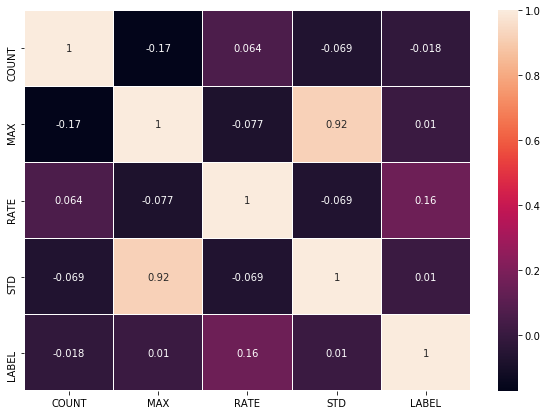

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_x.csv')
y = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/train_y.csv')

data = x.join(y)
cormat = data.corr()
f, ax = plt.subplots(figsize = (10,7))
sns.heatmap(cormat, annot = True, linewidths = 0.05, ax = ax)
plt.show()

In [1]:
#分段处理call_area_stats_per_city横向展开                        2018.10.25.     15:45-
import pandas as pd
import math
import numpy as np

######################################      读取data    #######################################
data = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

sub_data = data.query_prediction      #sub_data是个Series, 每个记录是个dict


#制作Series的index

cols = []
for i in range(0,10):
    temp = 'query_prediction_'+str(i)
    cols.append(temp)

#分段处理数据

######################################    para   #####################################

N = data.shape[0]
cur = 0 #当前处理行数

DFs = []
batch_size = 5000.0   #需带小数点，方便batch_num的计算
batch_num = math.ceil(N/batch_size)

######################################    process    ###################################

while cur < N:
    sub_cur = 0    
    T = pd.DataFrame(columns = cols)
    c = 0
    while sub_cur < int(batch_size):        #每一段的大小
        if cur == N:
            break
        temp = eval(sub_data[cur])
        v = list(temp.values())
        V = list(map(float,v))
        V = np.array(V)
        
        z = np.zeros(10-V.shape[0])
        val = np.hstack((V,z))
        
        s = pd.Series(val,index = cols)
        T.loc[sub_cur] = s
        
        sub_cur += 1
        cur += 1
    DFs.append(T)
    print(len(DFs) , '/' , batch_num)
print("Append Begin!")  
    
T = pd.concat(DFs)
print(T.shape)

##############################################################################

#Save
#T.to_csv('call_area_stats_per_city_unique_df.csv',index = False)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400
111 / 40

In [3]:
T.head(10)

,query_prediction_0,query_prediction_1,query_prediction_2,query_prediction_3,query_prediction_4,query_prediction_5,query_prediction_6,query_prediction_7,query_prediction_8,query_prediction_9
0,0.009,0.012,0.020,0.066,0.007,0.010,0.198,0.024,0.010,0.017
1,0.059,0.124,0.029,0.070,0.022,0.042,0.086,0.065,0.023,0.000
2,0.059,0.124,0.029,0.070,0.022,0.042,0.086,0.065,0.023,0.000
3,0.012,0.009,0.050,0.045,0.053,0.014,0.059,0.114,0.011,0.037
4,0.010,0.016,0.009,0.009,0.569,0.016,0.020,0.037,0.040,0.021
5,0.013,0.007,0.526,0.007,0.435,0.013,0.000,0.000,0.000,0.000
6,0.001,0.002,0.002,0.012,0.002,0.003,0.023,0.004,0.257,0.025
7,0.039,0.068,0.047,0.034,0.069,0.015,0.028,0.017,0.027,0.020
8,0.013,0.007,0.526,0.007,0.435,0.013,0.000,0.000,0.000,0.000
9,0.027,0.016,0.101,0.038,0.084,0.220,0.022,0.019,0.013,0.000


In [15]:
T['RATE'] = rate.values
T.head(10)

,query_prediction_0,query_prediction_1,query_prediction_2,query_prediction_3,query_prediction_4,query_prediction_5,query_prediction_6,query_prediction_7,query_prediction_8,query_prediction_9,RATE
0,0.009,0.012,0.020,0.066,0.007,0.010,0.198,0.024,0.010,0.017,0.313676
1,0.059,0.124,0.029,0.070,0.022,0.042,0.086,0.065,0.023,0.000,0.341615
2,0.059,0.124,0.029,0.070,0.022,0.042,0.086,0.065,0.023,0.000,0.437017
3,0.012,0.009,0.050,0.045,0.053,0.014,0.059,0.114,0.011,0.037,0.454706
4,0.010,0.016,0.009,0.009,0.569,0.016,0.020,0.037,0.040,0.021,0.437017
5,0.013,0.007,0.526,0.007,0.435,0.013,0.000,0.000,0.000,0.000,0.437017
6,0.001,0.002,0.002,0.012,0.002,0.003,0.023,0.004,0.257,0.025,0.395156
7,0.039,0.068,0.047,0.034,0.069,0.015,0.028,0.017,0.027,0.020,0.506395
8,0.013,0.007,0.526,0.007,0.435,0.013,0.000,0.000,0.000,0.000,0.506395
9,0.027,0.016,0.101,0.038,0.084,0.220,0.022,0.019,0.013,0.000,0.437017


In [16]:
T.to_csv('train_x_11.csv', index = False)

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/76000/Desktop/tianchi/oppo/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

data.head()

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,prefix,query_prediction,title,tag,label
0,小品,"{""小品大全宋小宝"": ""0.009"", ""小品相亲"": ""0.012"", ""小品剧本"": ...",小品,阅读,0
1,1368,"{""13688cc赛马会"": ""0.059"", ""13685367892"": ""0.124""...",HCG大于1368%2C正常吗,健康,0
2,1368,"{""13688cc赛马会"": ""0.059"", ""13685367892"": ""0.124""...",1368年,百科,1
3,银耳,"{""银耳汤的功效"": ""0.012"", ""银耳为什么不能天天吃"": ""0.009"", ""银耳...",银耳红枣汤的做法,菜谱,1
4,月经量少,"{""月经量少喝红糖水好吗"": ""0.010"", ""月经量少该怎么调理"": ""0.016"", ...",月经量少怎么调理,百科,0


In [2]:
tag_list = list(data.tag.unique())

bar_count = np.zeros((len(data.tag.unique()),2))

for i in range(0,data.shape[0]):
    t = data.loc[i].tag
    l = data.loc[i].label
    index = tag_list.index(t)
    if l == 0:
        bar_count[index][0] += 1
    else:
        bar_count[index][1] += 1

In [7]:
#分段处理call_area_stats_per_city横向展开                        2018.10.29.     10:31-
import pandas as pd
import math
import numpy as np

######################################      读取data    #######################################
data = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/origin/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

sub_data = data.query_prediction      #sub_data是个Series, 每个记录是个dict


#制作Series的index

cols = []
for i in range(0,10):
    key = 'query_key_'+str(i)
    value = 'query_value_'+str(i)
    cols.append(key)
    cols.append(value)

#分段处理数据

######################################    para   #####################################

N = data.shape[0]
cur = 0 #当前处理行数

DFs = []
batch_size = 2000.0   #需带小数点，方便batch_num的计算
batch_num = math.ceil(N/batch_size)

######################################    process    ###################################

while cur < N:
    sub_cur = 0    
    T = pd.DataFrame(columns = cols)
    c = 0
    while sub_cur < int(batch_size):        #每一段的大小
        if cur == N:
            break
        temp = eval(sub_data[cur])
        keys=temp.keys()
        vals=temp.values()
        V = []
        for (key,value) in zip(keys,vals):
            V.append(key)
            V.append(float(value))
        V = np.array(V)
        
        z = np.zeros(20-V.shape[0])
        val = np.hstack((V,z))
        
        s = pd.Series(val,index = cols)
        T.loc[sub_cur] = s
        
        sub_cur += 1
        cur += 1
    DFs.append(T)
    print(len(DFs) , '/' , batch_num)
print("Append Begin!")  
    
T = pd.concat(DFs)
print(T.shape)
print(T.head())

##############################################################################

#Save
#T.to_csv('call_area_stats_per_city_unique_df.csv',index = False)

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100 / 1000
101 / 10

756 / 1000
757 / 1000
758 / 1000
759 / 1000
760 / 1000
761 / 1000
762 / 1000
763 / 1000
764 / 1000
765 / 1000
766 / 1000
767 / 1000
768 / 1000
769 / 1000
770 / 1000
771 / 1000
772 / 1000
773 / 1000
774 / 1000
775 / 1000
776 / 1000
777 / 1000
778 / 1000
779 / 1000
780 / 1000
781 / 1000
782 / 1000
783 / 1000
784 / 1000
785 / 1000
786 / 1000
787 / 1000
788 / 1000
789 / 1000
790 / 1000
791 / 1000
792 / 1000
793 / 1000
794 / 1000
795 / 1000
796 / 1000
797 / 1000
798 / 1000
799 / 1000
800 / 1000
801 / 1000
802 / 1000
803 / 1000
804 / 1000
805 / 1000
806 / 1000
807 / 1000
808 / 1000
809 / 1000
810 / 1000
811 / 1000
812 / 1000
813 / 1000
814 / 1000
815 / 1000
816 / 1000
817 / 1000
818 / 1000
819 / 1000
820 / 1000
821 / 1000
822 / 1000
823 / 1000
824 / 1000
825 / 1000
826 / 1000
827 / 1000
828 / 1000
829 / 1000
830 / 1000
831 / 1000
832 / 1000
833 / 1000
834 / 1000
835 / 1000
836 / 1000
837 / 1000
838 / 1000
839 / 1000
840 / 1000
841 / 1000
842 / 1000
843 / 1000
844 / 1000
845 / 1000
846 / 1000

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/origin/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

sub_data = data.query_prediction

temp = eval(sub_data[0])
print(temp)

{'小品大全宋小宝': '0.009', '小品相亲': '0.012', '小品剧本': '0.020', '小品搞笑大全': '0.066', '小品不差钱': '0.007', '小品搞笑大全剧本': '0.010', '小品大全': '0.198', '小品演员': '0.024', '小品视频': '0.010', '小品大全剧本幽默大全': '0.017'}


E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
keys=temp.keys()
vals=temp.values()
L = []
for (key,value) in zip(keys,vals):
    L.append(key)
    L.append(float(value))
print(L)

['小品大全宋小宝', 0.009, '小品相亲', 0.012, '小品剧本', 0.02, '小品搞笑大全', 0.066, '小品不差钱', 0.007, '小品搞笑大全剧本', 0.01, '小品大全', 0.198, '小品演员', 0.024, '小品视频', 0.01, '小品大全剧本幽默大全', 0.017]


In [8]:
T.to_csv('train_query.csv',  index = False, encoding='utf_8_sig')

In [9]:
data = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/origin/oppo_round1_train_20180929.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag','label'])

T = pd.read_csv('C:/Users/76000/Desktop/OGeek/train_query.csv')

D = data.drop('query_prediction', axis = 1)
D.head()

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,prefix,title,tag,label
0,小品,小品,阅读,0
1,1368,HCG大于1368%2C正常吗,健康,0
2,1368,1368年,百科,1
3,银耳,银耳红枣汤的做法,菜谱,1
4,月经量少,月经量少怎么调理,百科,0


In [12]:
D = D.join(T)
D.head()

,prefix,title,tag,label,query_key_0,query_value_0,query_key_1,query_value_1,query_key_2,query_value_2,...,query_key_5,query_value_5,query_key_6,query_value_6,query_key_7,query_value_7,query_key_8,query_value_8,query_key_9,query_value_9
0,小品,小品,阅读,0,小品大全宋小宝,0.009,小品相亲,0.012,小品剧本,0.020,...,小品搞笑大全剧本,0.010,小品大全,0.198,小品演员,0.024,小品视频,0.010,小品大全剧本幽默大全,0.017
1,1368,HCG大于1368%2C正常吗,健康,0,13688cc赛马会,0.059,13685367892,0.124,13688cc,0.029,...,13688478100,0.042,1368年,0.086,13688..cc,0.065,13689557333.com,0.023,0.0,0.000
2,1368,1368年,百科,1,13688cc赛马会,0.059,13685367892,0.124,13688cc,0.029,...,13688478100,0.042,1368年,0.086,13688..cc,0.065,13689557333.com,0.023,0.0,0.000
3,银耳,银耳红枣汤的做法,菜谱,1,银耳汤的功效,0.012,银耳为什么不能天天吃,0.009,银耳莲子羹,0.050,...,银耳莲子汤,0.014,银耳汤的做法,0.059,银耳红枣汤,0.114,银耳的做法大全,0.011,银耳汤,0.037
4,月经量少,月经量少怎么调理,百科,0,月经量少喝红糖水好吗,0.010,月经量少该怎么调理,0.016,月经量少怎么,0.009,...,月经量少吃什么,0.016,月经量少吃什么药,0.020,月经量少怎么调理,0.037,月经量少怎么办,0.040,月经量少吃什么调理,0.021


In [13]:
D.to_csv('train_spread.csv', index = False, encoding='utf_8_sig')

In [14]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('train_spread.csv')

positive = data[data['label'].isin([1])]
negative = data[data['label'].isin([0])]

positive.shape

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(732256, 24)

In [15]:
negative.shape

(1234975, 24)

In [16]:
data.head()

,prefix,title,tag,label,query_key_0,query_value_0,query_key_1,query_value_1,query_key_2,query_value_2,...,query_key_5,query_value_5,query_key_6,query_value_6,query_key_7,query_value_7,query_key_8,query_value_8,query_key_9,query_value_9
0,小品,小品,阅读,0,小品大全宋小宝,0.009,小品相亲,0.012,小品剧本,0.020,...,小品搞笑大全剧本,0.010,小品大全,0.198,小品演员,0.024,小品视频,0.010,小品大全剧本幽默大全,0.017
1,1368,HCG大于1368%2C正常吗,健康,0,13688cc赛马会,0.059,13685367892,0.124,13688cc,0.029,...,13688478100,0.042,1368年,0.086,13688..cc,0.065,13689557333.com,0.023,0.0,0.000
2,1368,1368年,百科,1,13688cc赛马会,0.059,13685367892,0.124,13688cc,0.029,...,13688478100,0.042,1368年,0.086,13688..cc,0.065,13689557333.com,0.023,0.0,0.000
3,银耳,银耳红枣汤的做法,菜谱,1,银耳汤的功效,0.012,银耳为什么不能天天吃,0.009,银耳莲子羹,0.050,...,银耳莲子汤,0.014,银耳汤的做法,0.059,银耳红枣汤,0.114,银耳的做法大全,0.011,银耳汤,0.037
4,月经量少,月经量少怎么调理,百科,0,月经量少喝红糖水好吗,0.010,月经量少该怎么调理,0.016,月经量少怎么,0.009,...,月经量少吃什么,0.016,月经量少吃什么药,0.020,月经量少怎么调理,0.037,月经量少怎么办,0.040,月经量少吃什么调理,0.021


In [27]:
from gensim.models import Word2Vec
from gensim.models import word2vec

model = Word2Vec.load('word.model')
l = list(model.wv.vocab.keys())

print('Model Load Complete!')

def judge(rowa,rowb,l):
    if rowa not in l or rowb not in l:
        return 0
    else:
        return model.similarity(rowa,rowb)

data['p_q_0'] = data.apply(lambda row: judge(row['prefix'], row['query_key_0'],l), axis=1)
print('okay0')
data['p_q_1'] = data.apply(lambda row: judge(row['prefix'], row['query_key_1'],l), axis=1)
print('okay1')
data['p_q_2'] = data.apply(lambda row: judge(row['prefix'], row['query_key_2'],l), axis=1)
print('okay2')
data['p_q_3'] = data.apply(lambda row: judge(row['prefix'], row['query_key_3'],1), axis=1)
print('okay3')
data['p_q_4'] = data.apply(lambda row: judge(row['prefix'], row['query_key_4'],1), axis=1)
print('okay4')
data['p_q_5'] = data.apply(lambda row: judge(row['prefix'], row['query_key_5'],1), axis=1)
print('okay5')
data['p_q_6'] = data.apply(lambda row: judge(row['prefix'], row['query_key_6'],1), axis=1)
print('okay6')
data['p_q_7'] = data.apply(lambda row: judge(row['prefix'], row['query_key_7'],1), axis=1)
print('okay7')
data['p_q_8'] = data.apply(lambda row: judge(row['prefix'], row['query_key_8'],1), axis=1)
print('okay8')
data['p_q_9'] = data.apply(lambda row: judge(row['prefix'], row['query_key_9'],1), axis=1)
print('okay9')

Model Load Complete!


KeyboardInterrupt: 

In [11]:
import pandas as pd
import numpy as np
import math
from gensim.models import Word2Vec
from gensim.models import word2vec
import time

data = pd.read_csv('train_spread.csv')
data_rate = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/train_x.csv')
data['RATE'] = data_rate.RATE

data = data.sample(frac = 0.005)
data.index = list(range(0,data.shape[0]))

print(data.head())

model = Word2Vec.load('word.model')
l = list(model.wv.vocab.keys())

print('Model Load Complete!')

def judge(rowa,rowb,l):
    if rowa not in l or rowb not in l:
        return 0
    else:
        return model.similarity(rowa,rowb)
    
data['p_q_0'] = data.apply(lambda row: judge(row['prefix'], row['query_key_0'],l), axis=1)
print('okay0')
data['p_q_1'] = data.apply(lambda row: judge(row['prefix'], row['query_key_1'],l), axis=1)
print('okay1')
data['p_q_2'] = data.apply(lambda row: judge(row['prefix'], row['query_key_2'],l), axis=1)
print('okay2')
data['p_q_3'] = data.apply(lambda row: judge(row['prefix'], row['query_key_3'],l), axis=1)
print('okay3')
data['p_q_4'] = data.apply(lambda row: judge(row['prefix'], row['query_key_4'],l), axis=1)
print('okay4')
data['p_q_5'] = data.apply(lambda row: judge(row['prefix'], row['query_key_5'],l), axis=1)
print('okay5')
data['p_q_6'] = data.apply(lambda row: judge(row['prefix'], row['query_key_6'],l), axis=1)
print('okay6')
data['p_q_7'] = data.apply(lambda row: judge(row['prefix'], row['query_key_7'],l), axis=1)
print('okay7')
data['p_q_8'] = data.apply(lambda row: judge(row['prefix'], row['query_key_8'],l), axis=1)
print('okay8')
data['p_q_9'] = data.apply(lambda row: judge(row['prefix'], row['query_key_9'],l), axis=1)
print('okay9')
data['p_t_sim'] = data.apply(lambda row: judge(row['prefix'], row['title'],l), axis=1)
print('okay10')


E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


  prefix           title tag label query_key_0  query_value_0 query_key_1  \
0    御泥坊             御泥坊  应用     0      御泥坊怎么样          0.026   御泥坊的面膜怎么样   
1      御          御宅屋小说网  网站     1          御宅          0.014        御天邪神   
2     全国  全国大学英语四、六级考试官网  网站     1       全国征兵网          0.139    全国青少年普法网   
3     心情          一句心情签名  应用     0     心情说说至自己          0.015     心情不好的说说   
4   腾讯新闻            腾讯新闻  应用     1   腾讯新闻app下载          0.011       腾讯新闻.   

   query_value_1 query_key_2  query_value_2    ...    query_value_5  \
0          0.012   御泥坊适合什么年龄          0.037    ...            0.011   
1          0.027        御用兵王          0.011    ...            0.279   
2          0.009    全国交通违章查询          0.010    ...            0.008   
3          0.121     心情不好的句子          0.019    ...            0.013   
4          0.078     腾讯新闻手机版          0.008    ...            0.044   

   query_key_6 query_value_6  query_key_7 query_value_7  query_key_8  \
0   御泥坊的护肤品怎么样         0.013        御泥

In [12]:
data.shape

(10000, 35)

In [13]:
data.head()

,prefix,title,tag,label,query_key_0,query_value_0,query_key_1,query_value_1,query_key_2,query_value_2,...,p_q_0,p_q_1,p_q_2,p_q_3,p_q_4,p_q_5,p_q_6,p_q_7,p_q_8,p_q_9
0,御泥坊,御泥坊,应用,0,御泥坊怎么样,0.026,御泥坊的面膜怎么样,0.012,御泥坊适合什么年龄,0.037,...,0.661158,0.615463,0.573751,0.539051,0.467385,0.421444,0.437260,0.460690,0.503276,0.575927
1,御,御宅屋小说网,网站,1,御宅,0.014,御天邪神,0.027,御用兵王,0.011,...,0.512743,0.092900,0.198323,0.316254,0.000000,0.305935,0.546506,0.206940,0.059101,0.040387
2,全国,全国大学英语四、六级考试官网,网站,1,全国征兵网,0.139,全国青少年普法网,0.009,全国交通违章查询,0.010,...,0.350326,0.113788,0.286593,0.458963,0.447462,0.436045,0.319849,0.223915,0.011602,0.551745
3,心情,一句心情签名,应用,0,心情说说至自己,0.015,心情不好的说说,0.121,心情不好的句子,0.019,...,0.231886,0.158253,0.218099,0.217999,0.233820,0.243950,0.288583,0.369645,0.169004,0.283252
4,腾讯新闻,腾讯新闻,应用,1,腾讯新闻app下载,0.011,腾讯新闻.,0.078,腾讯新闻手机版,0.008,...,0.274333,0.268943,0.345004,0.365624,0.382565,0.387270,0.386280,0.356498,0.371004,0.292489


In [14]:
data['p_t_sim'] = data.apply(lambda row: judge(row['prefix'], row['title'],l), axis=1)
print('okay10')

okay10


In [15]:
drop_cols = []
for i in range(0,10):
    drop_cols.append('query_key_'+str(i))
    
D = data.drop(drop_cols, axis = 1)
D.head()

,prefix,title,tag,label,query_value_0,query_value_1,query_value_2,query_value_3,query_value_4,query_value_5,...,p_q_1,p_q_2,p_q_3,p_q_4,p_q_5,p_q_6,p_q_7,p_q_8,p_q_9,p_t_sim
0,御泥坊,御泥坊,应用,0,0.026,0.012,0.037,0.074,0.060,0.011,...,0.615463,0.573751,0.539051,0.467385,0.421444,0.437260,0.460690,0.503276,0.575927,1.000000
1,御,御宅屋小说网,网站,1,0.014,0.027,0.011,0.070,0.013,0.279,...,0.092900,0.198323,0.316254,0.000000,0.305935,0.546506,0.206940,0.059101,0.040387,0.628884
2,全国,全国大学英语四、六级考试官网,网站,1,0.139,0.009,0.010,0.008,0.010,0.008,...,0.113788,0.286593,0.458963,0.447462,0.436045,0.319849,0.223915,0.011602,0.551745,0.631708
3,心情,一句心情签名,应用,0,0.015,0.121,0.019,0.110,0.221,0.013,...,0.158253,0.218099,0.217999,0.233820,0.243950,0.288583,0.369645,0.169004,0.283252,0.867553
4,腾讯新闻,腾讯新闻,应用,1,0.011,0.078,0.008,0.009,0.020,0.044,...,0.268943,0.345004,0.365624,0.382565,0.387270,0.386280,0.356498,0.371004,0.292489,1.000000


In [16]:
drop_cols = ['tag', 'title', 'prefix']
D = D.drop(drop_cols, axis = 1)
D.head()

,label,query_value_0,query_value_1,query_value_2,query_value_3,query_value_4,query_value_5,query_value_6,query_value_7,query_value_8,...,p_q_1,p_q_2,p_q_3,p_q_4,p_q_5,p_q_6,p_q_7,p_q_8,p_q_9,p_t_sim
0,0,0.026,0.012,0.037,0.074,0.060,0.011,0.013,0.040,0.137,...,0.615463,0.573751,0.539051,0.467385,0.421444,0.437260,0.460690,0.503276,0.575927,1.000000
1,1,0.014,0.027,0.011,0.070,0.013,0.279,0.019,0.010,0.047,...,0.092900,0.198323,0.316254,0.000000,0.305935,0.546506,0.206940,0.059101,0.040387,0.628884
2,1,0.139,0.009,0.010,0.008,0.010,0.008,0.012,0.018,0.030,...,0.113788,0.286593,0.458963,0.447462,0.436045,0.319849,0.223915,0.011602,0.551745,0.631708
3,0,0.015,0.121,0.019,0.110,0.221,0.013,0.013,0.013,0.064,...,0.158253,0.218099,0.217999,0.233820,0.243950,0.288583,0.369645,0.169004,0.283252,0.867553
4,1,0.011,0.078,0.008,0.009,0.020,0.044,0.006,0.037,0.033,...,0.268943,0.345004,0.365624,0.382565,0.387270,0.386280,0.356498,0.371004,0.292489,1.000000


In [17]:
list(D.columns)

['label',
 'query_value_0',
 'query_value_1',
 'query_value_2',
 'query_value_3',
 'query_value_4',
 'query_value_5',
 'query_value_6',
 'query_value_7',
 'query_value_8',
 'query_value_9',
 'RATE',
 'p_q_0',
 'p_q_1',
 'p_q_2',
 'p_q_3',
 'p_q_4',
 'p_q_5',
 'p_q_6',
 'p_q_7',
 'p_q_8',
 'p_q_9',
 'p_t_sim']

In [18]:
D['p_q_0_r'] = D.apply(lambda row: row['query_value_0']*row['p_q_0'], axis=1)
print('okay0')
D['p_q_1_r'] = D.apply(lambda row: row['query_value_1']*row['p_q_1'], axis=1)
print('okay1')
D['p_q_2_r'] = D.apply(lambda row: row['query_value_2']*row['p_q_2'], axis=1)
print('okay2')
D['p_q_3_r'] = D.apply(lambda row: row['query_value_3']*row['p_q_3'], axis=1)
print('okay3')
D['p_q_4_r'] = D.apply(lambda row: row['query_value_4']*row['p_q_4'], axis=1)
print('okay4')
D['p_q_5_r'] = D.apply(lambda row: row['query_value_5']*row['p_q_5'], axis=1)
print('okay5')
D['p_q_6_r'] = D.apply(lambda row: row['query_value_6']*row['p_q_6'], axis=1)
print('okay6')
D['p_q_7_r'] = D.apply(lambda row: row['query_value_7']*row['p_q_7'], axis=1)
print('okay7')
D['p_q_8_r'] = D.apply(lambda row: row['query_value_8']*row['p_q_8'], axis=1)
print('okay8')
D['p_q_9_r'] = D.apply(lambda row: row['query_value_9']*row['p_q_9'], axis=1)
print('okay9')

D.head()

okay0
okay1
okay2
okay3
okay4
okay5
okay6
okay7
okay8
okay9


,label,query_value_0,query_value_1,query_value_2,query_value_3,query_value_4,query_value_5,query_value_6,query_value_7,query_value_8,...,p_q_0_r,p_q_1_r,p_q_2_r,p_q_3_r,p_q_4_r,p_q_5_r,p_q_6_r,p_q_7_r,p_q_8_r,p_q_9_r
0,0,0.026,0.012,0.037,0.074,0.060,0.011,0.013,0.040,0.137,...,0.017190,0.007386,0.021229,0.039890,0.028043,0.004636,0.005684,0.018428,0.068949,0.005759
1,1,0.014,0.027,0.011,0.070,0.013,0.279,0.019,0.010,0.047,...,0.007178,0.002508,0.002182,0.022138,0.000000,0.085356,0.010384,0.002069,0.002778,0.000889
2,1,0.139,0.009,0.010,0.008,0.010,0.008,0.012,0.018,0.030,...,0.048695,0.001024,0.002866,0.003672,0.004475,0.003488,0.003838,0.004030,0.000348,0.000000
3,0,0.015,0.121,0.019,0.110,0.221,0.013,0.013,0.013,0.064,...,0.003478,0.019149,0.004144,0.023980,0.051674,0.003171,0.003752,0.004805,0.010816,0.003682
4,1,0.011,0.078,0.008,0.009,0.020,0.044,0.006,0.037,0.033,...,0.003018,0.020978,0.002760,0.003291,0.007651,0.017040,0.002318,0.013190,0.012243,0.007605


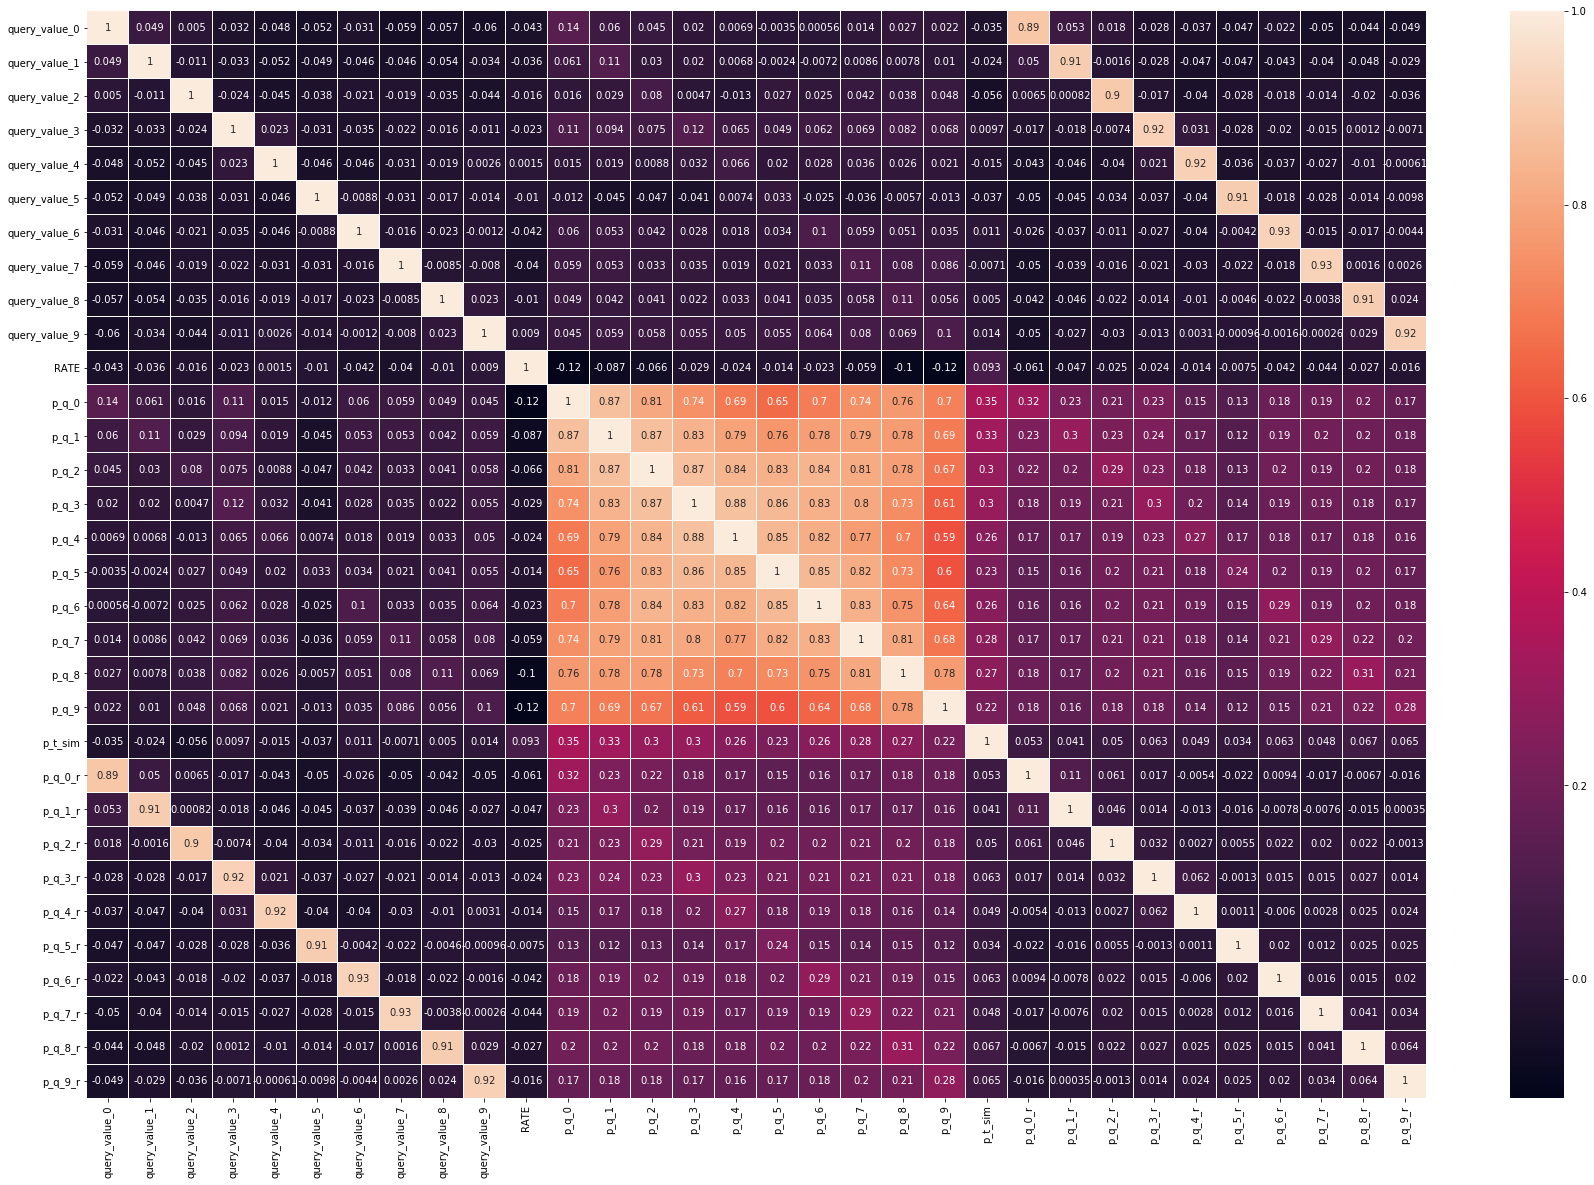

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cormat = D.corr()
f, ax = plt.subplots(figsize = (30,20))
sns.heatmap(cormat, annot = True, linewidths = 0.05, ax = ax)
plt.show()

In [28]:
D.shape

(10000, 33)

In [29]:
drop_cols = []
for i in range(0,10):
    drop_cols.append('query_value_'+str(i))
    drop_cols.append('p_q_'+str(i))
    
D = D.drop(drop_cols, axis = 1)
D.head()

,label,RATE,p_t_sim,p_q_0_r,p_q_1_r,p_q_2_r,p_q_3_r,p_q_4_r,p_q_5_r,p_q_6_r,p_q_7_r,p_q_8_r,p_q_9_r
0,0,0.395156,1.000000,0.017190,0.007386,0.021229,0.039890,0.028043,0.004636,0.005684,0.018428,0.068949,0.005759
1,1,0.547058,0.628884,0.007178,0.002508,0.002182,0.022138,0.000000,0.085356,0.010384,0.002069,0.002778,0.000889
2,1,0.547058,0.631708,0.048695,0.001024,0.002866,0.003672,0.004475,0.003488,0.003838,0.004030,0.000348,0.000000
3,0,0.395156,0.867553,0.003478,0.019149,0.004144,0.023980,0.051674,0.003171,0.003752,0.004805,0.010816,0.003682
4,1,0.395156,1.000000,0.003018,0.020978,0.002760,0.003291,0.007651,0.017040,0.002318,0.013190,0.012243,0.007605


In [32]:
cols = list(D.columns)
train_x = D.drop(['label'], axis = 1)
cols.remove('label')
train_y = D.drop(cols, axis = 1)

train_x.to_csv('12_train_x.csv', index = False, encoding = 'utf_8_sig')
train_y.to_csv('12_train_y.csv', index = False, encoding = 'utf_8_sig')

In [36]:
import pandas as pd
import numpy as np
import math
from gensim.models import Word2Vec
from gensim.models import word2vec
import datetime

data = pd.read_csv('train_spread.csv')
data_rate = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/train_x.csv')
data['RATE'] = data_rate.RATE

model = Word2Vec.load('word.model')
l = list(model.wv.vocab.keys())

print('Model Load Complete!')

def get_sample(data,rate):
    data = data.sample(frac = rate)
    data.index = list(range(0,data.shape[0]))
    return data

def judge(rowa,rowb,l):
    if rowa not in l or rowb not in l:
        return 0
    else:
        return model.similarity(rowa,rowb)
    
def cal_dis(data,l):
    data['p_q_0'] = data.apply(lambda row: judge(row['prefix'], row['query_key_0'],l), axis=1)

    data['p_q_1'] = data.apply(lambda row: judge(row['prefix'], row['query_key_1'],l), axis=1)

    data['p_q_2'] = data.apply(lambda row: judge(row['prefix'], row['query_key_2'],l), axis=1)

    data['p_q_3'] = data.apply(lambda row: judge(row['prefix'], row['query_key_3'],l), axis=1)

    data['p_q_4'] = data.apply(lambda row: judge(row['prefix'], row['query_key_4'],l), axis=1)

    data['p_q_5'] = data.apply(lambda row: judge(row['prefix'], row['query_key_5'],l), axis=1)

    data['p_q_6'] = data.apply(lambda row: judge(row['prefix'], row['query_key_6'],l), axis=1)

    data['p_q_7'] = data.apply(lambda row: judge(row['prefix'], row['query_key_7'],l), axis=1)

    data['p_q_8'] = data.apply(lambda row: judge(row['prefix'], row['query_key_8'],l), axis=1)

    data['p_q_9'] = data.apply(lambda row: judge(row['prefix'], row['query_key_9'],l), axis=1)

    data['p_t_sim'] = data.apply(lambda row: judge(row['prefix'], row['title'],l), axis=1)

    return data

def cal_rate(data):
    data['p_q_0_r'] = data.apply(lambda row: row['query_value_0']*row['p_q_0'], axis=1)

    data['p_q_1_r'] = data.apply(lambda row: row['query_value_1']*row['p_q_1'], axis=1)

    data['p_q_2_r'] = data.apply(lambda row: row['query_value_2']*row['p_q_2'], axis=1)

    data['p_q_3_r'] = data.apply(lambda row: row['query_value_3']*row['p_q_3'], axis=1)

    data['p_q_4_r'] = data.apply(lambda row: row['query_value_4']*row['p_q_4'], axis=1)

    data['p_q_5_r'] = data.apply(lambda row: row['query_value_5']*row['p_q_5'], axis=1)

    data['p_q_6_r'] = data.apply(lambda row: row['query_value_6']*row['p_q_6'], axis=1)

    data['p_q_7_r'] = data.apply(lambda row: row['query_value_7']*row['p_q_7'], axis=1)

    data['p_q_8_r'] = data.apply(lambda row: row['query_value_8']*row['p_q_8'], axis=1)

    data['p_q_9_r'] = data.apply(lambda row: row['query_value_9']*row['p_q_9'], axis=1)

    return data

def drop_not_use(data):
    drop_cols = []
    for i in range(0,10):
        drop_cols.append('query_key_'+str(i))
        drop_cols.append('query_value_'+str(i))
        drop_cols.append('p_q_'+str(i))
    drop_cols.append('title')
    drop_cols.append('prefix')
    drop_cols.append('tag')
    data = data.drop(drop_cols, axis = 1)
    return data

for i in range(0,10):
    sample = get_sample(data, 0.005)
    start = datetime.datetime.now()
    sample = cal_dis(sample,l)
    end = datetime.datetime.now()
    print(end-start)
    sample = cal_rate(sample)
    sample = drop_not_use(sample)
    sample_x = sample.drop(['label'], axis = 1)
    cols = list(sample.columns)
    cols.remove('label')
    sample_y = sample.drop(cols, axis = 1)
    sample_x.to_csv('12_train_sample_x_'+str(i)+'.csv', index = False, encoding = 'utf_8_sig')
    sample_y.to_csv('12_train_sample_y_'+str(i)+'.csv', index = False, encoding = 'utf_8_sig')
    print('sample_'+str(i)+' Complete!')

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Model Load Complete!
0:39:00.387244
sample_0 Complete!
0:57:40.229093
sample_1 Complete!
0:40:23.881305
sample_2 Complete!
0:34:52.895051
sample_3 Complete!
0:35:08.787635
sample_4 Complete!
0:34:14.397992
sample_5 Complete!
0:31:47.662422
sample_6 Complete!
0:32:38.349008
sample_7 Complete!
0:32:43.069171
sample_8 Complete!
0:33:18.908656
sample_9 Complete!


In [37]:
sample_x.head()

,RATE,p_t_sim,p_q_0_r,p_q_1_r,p_q_2_r,p_q_3_r,p_q_4_r,p_q_5_r,p_q_6_r,p_q_7_r,p_q_8_r,p_q_9_r
0,0.437017,0.766558,0.008845,0.022230,0.027997,0.006535,0.016891,0.009322,0.205426,0.000000,0.000000,0.000000
1,0.506395,0.781837,0.050476,0.013252,0.031506,0.006506,0.017123,0.031767,0.025003,0.075344,0.008975,0.007506
2,0.301957,0.894623,0.004150,0.022774,0.015165,0.006413,0.009451,0.008758,0.013162,0.021685,0.008019,0.069178
3,0.437017,0.468984,0.011917,0.023069,0.011771,0.025384,0.013533,0.009539,0.020883,0.020695,0.068571,0.118184
4,0.454706,0.435142,0.029510,0.005418,0.006544,0.054828,0.008643,0.015314,0.008828,0.038245,0.007625,0.068169


In [3]:
import pandas as pd
import numpy as np
import math
from gensim.models import Word2Vec
from gensim.models import word2vec
import datetime

data = pd.read_csv('train_spread.csv')
data_rate = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/train_x.csv')
data['RATE'] = data_rate.RATE

model = Word2Vec.load('word.model')
l = list(model.wv.vocab.keys())

print('Model Load Complete!')

def get_sample(data,rate):
    data = data.sample(frac = rate)
    data.index = list(range(0,data.shape[0]))
    return data

def judge(rowa,rowb,l):
    if rowa not in l or rowb not in l:
        return 0
    else:
        return model.similarity(rowa,rowb)
    
def cal_dis(data,l):
    start = datetime.datetime.now()
    data['p_q_0'] = data.apply(lambda row: judge(row['prefix'], row['query_key_0'],l), axis=1)
    end = datetime.datetime.now()
    print(end-start)
    data['p_q_1'] = data.apply(lambda row: judge(row['prefix'], row['query_key_1'],l), axis=1)
    print('okay1')
    data['p_q_2'] = data.apply(lambda row: judge(row['prefix'], row['query_key_2'],l), axis=1)
    print('okay2')
    data['p_q_3'] = data.apply(lambda row: judge(row['prefix'], row['query_key_3'],l), axis=1)
    print('okay3')
    data['p_q_4'] = data.apply(lambda row: judge(row['prefix'], row['query_key_4'],l), axis=1)
    print('okay4')
    data['p_q_5'] = data.apply(lambda row: judge(row['prefix'], row['query_key_5'],l), axis=1)
    print('okay5')
    data['p_q_6'] = data.apply(lambda row: judge(row['prefix'], row['query_key_6'],l), axis=1)
    print('okay6')
    data['p_q_7'] = data.apply(lambda row: judge(row['prefix'], row['query_key_7'],l), axis=1)
    print('okay7')
    data['p_q_8'] = data.apply(lambda row: judge(row['prefix'], row['query_key_8'],l), axis=1)
    print('okay8')
    data['p_q_9'] = data.apply(lambda row: judge(row['prefix'], row['query_key_9'],l), axis=1)
    print('okay9')
    data['p_t_sim'] = data.apply(lambda row: judge(row['prefix'], row['title'],l), axis=1)
    print('okay10')
    return data

def drop_not_use(data):
    drop_cols = []
    for i in range(0,10):
        drop_cols.append('query_key_'+str(i))
    drop_cols.append('title')
    drop_cols.append('prefix')
    drop_cols.append('tag')
    data = data.drop(drop_cols, axis = 1)
    return data


sample = get_sample(data, 0.05)
sample.to_csv('sample_100k.csv', index = False, encoding = 'utf_8_sig')


E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Model Load Complete!


In [3]:
import pandas as pd
import numpy as np
import math
from gensim.models import Word2Vec
from gensim.models import word2vec
import datetime

def judge(rowa,rowb,l):
    if rowa not in l or rowb not in l:
        return 0
    else:
        return model.similarity(rowa,rowb)
    
def cal_dis(data,l):
    start = datetime.datetime.now()
    data['p_q_0'] = data.apply(lambda row: judge(row['prefix'], row['query_key_0'],l), axis=1)
    end = datetime.datetime.now()
    print(end-start)
    data['p_q_1'] = data.apply(lambda row: judge(row['prefix'], row['query_key_1'],l), axis=1)
    print('okay1')
    data['p_q_2'] = data.apply(lambda row: judge(row['prefix'], row['query_key_2'],l), axis=1)
    print('okay2')
    data['p_q_3'] = data.apply(lambda row: judge(row['prefix'], row['query_key_3'],l), axis=1)
    print('okay3')
    data['p_q_4'] = data.apply(lambda row: judge(row['prefix'], row['query_key_4'],l), axis=1)
    print('okay4')
    data['p_q_5'] = data.apply(lambda row: judge(row['prefix'], row['query_key_5'],l), axis=1)
    print('okay5')
    data['p_q_6'] = data.apply(lambda row: judge(row['prefix'], row['query_key_6'],l), axis=1)
    print('okay6')
    data['p_q_7'] = data.apply(lambda row: judge(row['prefix'], row['query_key_7'],l), axis=1)
    print('okay7')
    data['p_q_8'] = data.apply(lambda row: judge(row['prefix'], row['query_key_8'],l), axis=1)
    print('okay8')
    data['p_q_9'] = data.apply(lambda row: judge(row['prefix'], row['query_key_9'],l), axis=1)
    print('okay9')
    data['p_t_sim'] = data.apply(lambda row: judge(row['prefix'], row['title'],l), axis=1)
    print('okay10')
    return data

def drop_not_use(data):
    drop_cols = []
    for i in range(0,10):
        drop_cols.append('query_key_'+str(i))
    drop_cols.append('title')
    drop_cols.append('prefix')
    drop_cols.append('tag')
    data = data.drop(drop_cols, axis = 1)
    return data

model = Word2Vec.load('word.model')
l = list(model.wv.vocab.keys())

print('Model Load Complete!')
sample = pd.read_csv('sample_100k.csv')
start = datetime.datetime.now()
sample = cal_dis(sample,l)
end = datetime.datetime.now()
print(end-start)
sample = drop_not_use(sample)
sample_x = sample.drop(['label'], axis = 1)
cols = list(sample.columns)
cols.remove('label')
sample_y = sample.drop(cols, axis = 1)
sample_x.to_csv('22_train_sample_100k_x.csv', index = False, encoding = 'utf_8_sig')
sample_y.to_csv('22_train_sample_100k_y.csv', index = False, encoding = 'utf_8_sig')
print('sample Complete!')

E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Model Load Complete!
0:13:59.696164
okay1
okay2
okay3
okay4
okay5
okay6
okay7
okay8
okay9
okay10
2:40:49.897803
sample Complete!


In [4]:
sample_x.head()

,query_value_0,query_value_1,query_value_2,query_value_3,query_value_4,query_value_5,query_value_6,query_value_7,query_value_8,query_value_9,...,p_q_1,p_q_2,p_q_3,p_q_4,p_q_5,p_q_6,p_q_7,p_q_8,p_q_9,p_t_sim
0,0.056,0.012,0.02,0.013,0.011,0.019,0.087,0.037,0.022,0.000,...,0.141901,0.212133,0.302911,0.415594,0.351566,0.241841,0.407098,0.081173,0.303107,0.413560
1,0.032,0.032,0.05,0.043,0.008,0.275,0.143,0.020,0.017,0.011,...,0.826660,0.847988,0.851647,0.837895,0.887428,0.858000,0.874213,0.793050,0.622545,0.554144
2,0.003,0.002,0.01,0.005,0.002,0.809,0.051,0.006,0.002,0.002,...,-0.129770,0.036623,0.159419,0.552773,0.401195,0.199642,0.167505,0.300375,0.209160,0.336888
3,0.030,0.055,0.08,0.016,0.026,0.029,0.042,0.021,0.000,0.000,...,0.863314,0.842514,0.814510,0.801258,0.776912,0.816033,0.857213,0.663815,0.663815,0.839666
4,0.008,0.005,0.03,0.007,0.007,0.019,0.036,0.008,0.006,0.007,...,0.384199,0.373113,0.332112,0.312168,0.345694,0.321690,0.358372,0.348369,0.407883,1.000000


In [11]:
sample = pd.read_csv('sample_100k.csv')
unique = sample.drop_duplicates(['title'])
unique.shape

(40614, 25)

In [12]:
positive = unique[unique['label'].isin([1])]
negative = unique[unique['label'].isin([0])]
print(positive.shape)
print(negative.shape)

(15131, 25)
(25483, 25)


In [13]:
unique.to_csv('sample_unique_40k.csv', index = False, encoding = 'utf_8_sig')

In [14]:
import pandas as pd
import numpy as np
import math
from gensim.models import Word2Vec
from gensim.models import word2vec
import datetime

def judge(rowa,rowb,l):
    if rowa not in l or rowb not in l:
        return 0
    else:
        return model.similarity(rowa,rowb)
    
def cal_dis(data,l):
    start = datetime.datetime.now()
    data['p_q_0'] = data.apply(lambda row: judge(row['prefix'], row['query_key_0'],l), axis=1)
    end = datetime.datetime.now()
    print(end-start)
    data['p_q_1'] = data.apply(lambda row: judge(row['prefix'], row['query_key_1'],l), axis=1)
    print('okay1')
    data['p_q_2'] = data.apply(lambda row: judge(row['prefix'], row['query_key_2'],l), axis=1)
    print('okay2')
    data['p_q_3'] = data.apply(lambda row: judge(row['prefix'], row['query_key_3'],l), axis=1)
    print('okay3')
    data['p_q_4'] = data.apply(lambda row: judge(row['prefix'], row['query_key_4'],l), axis=1)
    print('okay4')
    data['p_q_5'] = data.apply(lambda row: judge(row['prefix'], row['query_key_5'],l), axis=1)
    print('okay5')
    data['p_q_6'] = data.apply(lambda row: judge(row['prefix'], row['query_key_6'],l), axis=1)
    print('okay6')
    data['p_q_7'] = data.apply(lambda row: judge(row['prefix'], row['query_key_7'],l), axis=1)
    print('okay7')
    data['p_q_8'] = data.apply(lambda row: judge(row['prefix'], row['query_key_8'],l), axis=1)
    print('okay8')
    data['p_q_9'] = data.apply(lambda row: judge(row['prefix'], row['query_key_9'],l), axis=1)
    print('okay9')
    data['p_t_sim'] = data.apply(lambda row: judge(row['prefix'], row['title'],l), axis=1)
    print('okay10')
    return data

def drop_not_use(data):
    drop_cols = []
    for i in range(0,10):
        drop_cols.append('query_key_'+str(i))
    drop_cols.append('title')
    drop_cols.append('prefix')
    drop_cols.append('tag')
    data = data.drop(drop_cols, axis = 1)
    return data

model = Word2Vec.load('word.model')
l = list(model.wv.vocab.keys())

print('Model Load Complete!')
sample = pd.read_csv('sample_unique_40k.csv')
start = datetime.datetime.now()
sample = cal_dis(sample,l)
end = datetime.datetime.now()
print(end-start)
sample = drop_not_use(sample)
sample_x = sample.drop(['label'], axis = 1)
cols = list(sample.columns)
cols.remove('label')
sample_y = sample.drop(cols, axis = 1)
sample_x.to_csv('22_train_sample_unique_100k_x.csv', index = False, encoding = 'utf_8_sig')
sample_y.to_csv('22_train_sample_unique_100k_y.csv', index = False, encoding = 'utf_8_sig')
print('sample Complete!')

Model Load Complete!
0:10:44.941682
okay1
okay2
okay3
okay4
okay5
okay6
okay7
okay8
okay9
okay10
3:07:20.923355
sample Complete!


In [21]:
def get_sample(data,rate):
    data = data.sample(frac = rate)
    data.index = list(range(0,data.shape[0]))
    return data

data = pd.read_csv('train_spread.csv')
data_rate = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/train_x.csv')
data['RATE'] = data_rate.RATE

data = data.drop_duplicates(['title'])

data.shape



E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(251165, 25)

In [22]:
data.to_csv('unique_250k.csv', index = False, encoding = 'utf_8_sig')

In [23]:
import pandas as pd
import numpy as np
import math
from gensim.models import Word2Vec
from gensim.models import word2vec
import datetime

def judge(rowa,rowb,l):
    if rowa not in l or rowb not in l:
        return 0
    else:
        return model.similarity(rowa,rowb)
    
def cal_dis(data,l):
    start = datetime.datetime.now()
    data['p_q_0'] = data.apply(lambda row: judge(row['prefix'], row['query_key_0'],l), axis=1)
    end = datetime.datetime.now()
    print(end-start)
    data['p_q_1'] = data.apply(lambda row: judge(row['prefix'], row['query_key_1'],l), axis=1)
    print('okay1')
    data['p_q_2'] = data.apply(lambda row: judge(row['prefix'], row['query_key_2'],l), axis=1)
    print('okay2')
    data['p_q_3'] = data.apply(lambda row: judge(row['prefix'], row['query_key_3'],l), axis=1)
    print('okay3')
    data['p_q_4'] = data.apply(lambda row: judge(row['prefix'], row['query_key_4'],l), axis=1)
    print('okay4')
    data['p_q_5'] = data.apply(lambda row: judge(row['prefix'], row['query_key_5'],l), axis=1)
    print('okay5')
    data['p_q_6'] = data.apply(lambda row: judge(row['prefix'], row['query_key_6'],l), axis=1)
    print('okay6')
    data['p_q_7'] = data.apply(lambda row: judge(row['prefix'], row['query_key_7'],l), axis=1)
    print('okay7')
    data['p_q_8'] = data.apply(lambda row: judge(row['prefix'], row['query_key_8'],l), axis=1)
    print('okay8')
    data['p_q_9'] = data.apply(lambda row: judge(row['prefix'], row['query_key_9'],l), axis=1)
    print('okay9')
    data['p_t_sim'] = data.apply(lambda row: judge(row['prefix'], row['title'],l), axis=1)
    print('okay10')
    return data

def drop_not_use(data):
    drop_cols = []
    for i in range(0,10):
        drop_cols.append('query_key_'+str(i))
    drop_cols.append('title')
    drop_cols.append('prefix')
    drop_cols.append('tag')
    data = data.drop(drop_cols, axis = 1)
    return data

model = Word2Vec.load('word.model')
l = list(model.wv.vocab.keys())

print('Model Load Complete!')
sample = pd.read_csv('unique_250k.csv')
start = datetime.datetime.now()
sample = cal_dis(sample,l)
end = datetime.datetime.now()
print(end-start)
sample = drop_not_use(sample)
sample_x = sample.drop(['label'], axis = 1)
cols = list(sample.columns)
cols.remove('label')
sample_y = sample.drop(cols, axis = 1)
sample_x.to_csv('22_train_unique_250k_x.csv', index = False, encoding = 'utf_8_sig')
sample_y.to_csv('22_train_unique_250k_y.csv', index = False, encoding = 'utf_8_sig')
print('sample Complete!')

Model Load Complete!


E:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2:52:16.344297
okay1


KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/42_train_sample_100k_x.csv')

data.columns

Index(['query_value_0', 'query_value_1', 'query_value_2', 'query_value_3',
       'query_value_4', 'query_value_5', 'query_value_6', 'query_value_7',
       'query_value_8', 'query_value_9', 'p_q_0', 'p_q_1', 'p_q_2', 'p_q_3',
       'p_q_4', 'p_q_5', 'p_q_6', 'p_q_7', 'p_q_8', 'p_q_9', 'p_t_sim',
       'tag_0', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7',
       'tag_8', 'tag_9', 'tag_10', 'tag_11', 'tag_12', 'tag_13', 'tag_14',
       'tag_15', 'tag_16', 'tag_17', 'tag_18', 'tag_19', 'tag_20'],
      dtype='object')

In [3]:
cols = []
for i in range(0,10):
    cols.append('query_value_'+str(i))
query_value = data[cols]
query_value = np.sort(query_value)
data[cols] = query_value

In [4]:
data.to_csv('42_train_sample_100k_sorted_x.csv',index = False, encoding = 'utf_8_sig')

In [1]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/csv/42_features_merge_x.csv')
data.shape

(409391, 42)

In [2]:
cols = []
for i in range(0,10):
    cols.append('query_value_'+str(i))
query_value = data[cols]
query_value = np.sort(query_value)
data[cols] = query_value

In [3]:
data.to_csv('42_features_merge_sorted_x.csv',index = False, encoding = 'utf_8_sig')

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/origin/oppo_round1_test_B_20181106.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag'])

data.head()

,prefix,query_prediction,title,tag
0,新生儿游泳,"{""新生儿游泳去黄疸吗"": ""0.013"", ""新生儿游泳时间"": ""0.012"", ""新生...",新生儿游泳到底好不好呀？,健康
1,吴奇隆,"{""吴奇隆李小冉"": ""0.011"", ""吴奇隆电视剧"": ""0.021"", ""吴奇隆的综艺...",吴奇隆刘诗诗公开恋情 马苏怎么办呢,影视
2,炎,"{""炎琥宁"": ""0.013"", ""炎武战神"": ""0.023"", ""炎帝"": ""0.020...",炎亚纶,百科
3,知乎,"{""知乎2018必读书单"": ""0.004"", ""知乎翎春君"": ""0.007"", ""知乎暗...",知乎,应用
4,快递查,"{""快递查询询"": ""0.001"", ""快递查单号"": ""0.001"", ""快递查询自动识别...",快递查询,应用


In [1]:
import pandas as pd
import math
import numpy as np

######################################      读取data    #######################################
data = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/origin/oppo_round1_test_B_20181106.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag'])

sub_data = data.query_prediction      #sub_data是个Series, 每个记录是个dict


#制作Series的index

cols = []
for i in range(0,10):
    key = 'query_key_'+str(i)
    value = 'query_value_'+str(i)
    cols.append(key)
    cols.append(value)

#分段处理数据

######################################    para   #####################################

N = data.shape[0]
cur = 0 #当前处理行数

DFs = []
batch_size = 500.0   #需带小数点，方便batch_num的计算
batch_num = math.ceil(N/batch_size)

######################################    process    ###################################

while cur < N:
    sub_cur = 0    
    T = pd.DataFrame(columns = cols)
    c = 0
    while sub_cur < int(batch_size):        #每一段的大小
        if cur == N:
            break
        temp = eval(sub_data[cur])
        keys=temp.keys()
        vals=temp.values()
        V = []
        for (key,value) in zip(keys,vals):
            V.append(key)
            V.append(float(value))
        V = np.array(V)
        
        z = np.zeros(20-V.shape[0])
        val = np.hstack((V,z))
        
        s = pd.Series(val,index = cols)
        T.loc[sub_cur] = s
        
        sub_cur += 1
        cur += 1
    DFs.append(T)
    print(len(DFs) , '/' , batch_num)
print("Append Begin!")  
    
T = pd.concat(DFs)
print(T.shape)
print(T.head())

##############################################################################

#Save
#T.to_csv('call_area_stats_per_city_unique_df.csv',index = False)

1 / 500
2 / 500
3 / 500
4 / 500
5 / 500
6 / 500
7 / 500
8 / 500
9 / 500
10 / 500
11 / 500
12 / 500
13 / 500
14 / 500
15 / 500
16 / 500
17 / 500
18 / 500
19 / 500
20 / 500
21 / 500
22 / 500
23 / 500
24 / 500
25 / 500
26 / 500
27 / 500
28 / 500
29 / 500
30 / 500
31 / 500
32 / 500
33 / 500
34 / 500
35 / 500
36 / 500
37 / 500
38 / 500
39 / 500
40 / 500
41 / 500
42 / 500
43 / 500
44 / 500
45 / 500
46 / 500
47 / 500
48 / 500
49 / 500
50 / 500
51 / 500
52 / 500
53 / 500
54 / 500
55 / 500
56 / 500
57 / 500
58 / 500
59 / 500
60 / 500
61 / 500
62 / 500
63 / 500
64 / 500
65 / 500
66 / 500
67 / 500
68 / 500
69 / 500
70 / 500
71 / 500
72 / 500
73 / 500
74 / 500
75 / 500
76 / 500
77 / 500
78 / 500
79 / 500
80 / 500
81 / 500
82 / 500
83 / 500
84 / 500
85 / 500
86 / 500
87 / 500
88 / 500
89 / 500
90 / 500
91 / 500
92 / 500
93 / 500
94 / 500
95 / 500
96 / 500
97 / 500
98 / 500
99 / 500
100 / 500
101 / 500
102 / 500
103 / 500
104 / 500
105 / 500
106 / 500
107 / 500
108 / 500
109 / 500
110 / 500
111 / 50

In [2]:
T.to_csv('test_B_query.csv', index = False,encoding='utf_8_sig')

In [3]:
T = pd.read_csv('test_B_query.csv')
data = data.drop(['query_prediction'], axis = 1)
data = data.join(T)
data.head()

,prefix,title,tag,query_key_0,query_value_0,query_key_1,query_value_1,query_key_2,query_value_2,query_key_3,...,query_key_5,query_value_5,query_key_6,query_value_6,query_key_7,query_value_7,query_key_8,query_value_8,query_key_9,query_value_9
0,新生儿游泳,新生儿游泳到底好不好呀？,健康,新生儿游泳去黄疸吗,0.013,新生儿游泳时间,0.012,新生儿游泳的好处,0.263,新生儿游泳视频教程,...,新生儿游泳视频,0.032,新生儿游泳注意事项,0.012,新生儿游泳的最佳时间,0.332,新生儿游泳有什么好处,0.012,新生儿游泳多久一次,0.036
1,吴奇隆,吴奇隆刘诗诗公开恋情 马苏怎么办呢,影视,吴奇隆李小冉,0.011,吴奇隆电视剧,0.021,吴奇隆的综艺,0.006,吴奇隆微博,...,吴奇隆前妻,0.014,吴奇隆年龄,0.008,吴奇隆电视剧大全,0.007,吴奇隆刘诗诗,0.023,吴奇隆身高,0.007
2,炎,炎亚纶,百科,炎琥宁,0.013,炎武战神,0.023,炎帝,0.020,炎凉和梁希城在楼梯做,...,炎琥宁的作用与功效,0.019,炎龙铠甲,0.020,炎亚纶,0.077,炎景熙陆沐擎免费阅读,0.013,炎症是怎么引起的,0.024
3,知乎,知乎,应用,知乎2018必读书单,0.004,知乎翎春君,0.007,知乎暗网到底有多恐怖,0.016,知乎网,...,知乎害了多少人,0.011,知乎下载,0.015,知乎网页版,0.017,知乎是什么软件,0.009,0.0,0.000
4,快递查,快递查询,应用,快递查询询,0.001,快递查单号,0.001,快递查询自动识别,0.003,快递查询,...,快递查询单号,0.292,快递查询单号查询,0.027,快递查单询,0.102,快递查单询中通,0.001,0.0,0.000


In [4]:
data.to_csv('test_spread_B.csv', index = False, encoding = 'utf_8_sig')

In [1]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('C:/Users/76000/Desktop/TC_DATA/oppo/origin/oppo_round1_test_B_20181106.txt', sep='\t', header=None,
                     names = ['prefix','query_prediction','title','tag'])

sub_data = data.query_prediction      #sub_data是个Series, 每个记录是个dict

#分段处理数据

######################################    para   #####################################

N = data.shape[0]
cur = 0 #当前处理行数

batch_size = 500.0   #需带小数点，方便batch_num的计算
batch_num = math.ceil(N/batch_size)

######################################    process    ###################################
s = []
while cur < N:
    sub_cur = 0    
    T = []
    c = 0
    while sub_cur < int(batch_size):        #每一段的大小
        if cur == N:
            break
        temp = eval(sub_data[cur])
        keys=list(temp.keys())
        
        for element in keys:
            T.append(element)
        
        sub_cur += 1
        cur += 1
    s.append(T)
    print(len(s) , '/' , batch_num)
    

sub_data = data.prefix
cur = 0
while cur < N:
    sub_cur = 0    
    T = []
    c = 0
    while sub_cur < int(batch_size):        #每一段的大小
        if cur == N:
            break
        temp = sub_data[cur]
        T.append(temp)
        
        sub_cur += 1
        cur += 1
    s.append(T)
    print(len(s) , '/' , 2*batch_num)
    
    
sub_data = data.title
cur = 0
while cur < N:
    sub_cur = 0    
    T = []
    c = 0
    while sub_cur < int(batch_size):        #每一段的大小
        if cur == N:
            break
        temp = sub_data[cur]
        T.append(temp)
        
        sub_cur += 1
        cur += 1
    s.append(T)
    print(len(s) , '/' , 3*batch_num)
file=open('test_B_words.txt','w', encoding='utf-8')
for i in range(0,len(s)):
    sub_list = s[i]
    for element in sub_list:
        file.write(str(element)+' ');
file.close()

1 / 500
2 / 500
3 / 500
4 / 500
5 / 500
6 / 500
7 / 500
8 / 500
9 / 500
10 / 500
11 / 500
12 / 500
13 / 500
14 / 500
15 / 500
16 / 500
17 / 500
18 / 500
19 / 500
20 / 500
21 / 500
22 / 500
23 / 500
24 / 500
25 / 500
26 / 500
27 / 500
28 / 500
29 / 500
30 / 500
31 / 500
32 / 500
33 / 500
34 / 500
35 / 500
36 / 500
37 / 500
38 / 500
39 / 500
40 / 500
41 / 500
42 / 500
43 / 500
44 / 500
45 / 500
46 / 500
47 / 500
48 / 500
49 / 500
50 / 500
51 / 500
52 / 500
53 / 500
54 / 500
55 / 500
56 / 500
57 / 500
58 / 500
59 / 500
60 / 500
61 / 500
62 / 500
63 / 500
64 / 500
65 / 500
66 / 500
67 / 500
68 / 500
69 / 500
70 / 500
71 / 500
72 / 500
73 / 500
74 / 500
75 / 500
76 / 500
77 / 500
78 / 500
79 / 500
80 / 500
81 / 500
82 / 500
83 / 500
84 / 500
85 / 500
86 / 500
87 / 500
88 / 500
89 / 500
90 / 500
91 / 500
92 / 500
93 / 500
94 / 500
95 / 500
96 / 500
97 / 500
98 / 500
99 / 500
100 / 500
101 / 500
102 / 500
103 / 500
104 / 500
105 / 500
106 / 500
107 / 500
108 / 500
109 / 500
110 / 500
111 / 50

992 / 1000
993 / 1000
994 / 1000
995 / 1000
996 / 1000
997 / 1000
998 / 1000
999 / 1000
1000 / 1000
1001 / 1500
1002 / 1500
1003 / 1500
1004 / 1500
1005 / 1500
1006 / 1500
1007 / 1500
1008 / 1500
1009 / 1500
1010 / 1500
1011 / 1500
1012 / 1500
1013 / 1500
1014 / 1500
1015 / 1500
1016 / 1500
1017 / 1500
1018 / 1500
1019 / 1500
1020 / 1500
1021 / 1500
1022 / 1500
1023 / 1500
1024 / 1500
1025 / 1500
1026 / 1500
1027 / 1500
1028 / 1500
1029 / 1500
1030 / 1500
1031 / 1500
1032 / 1500
1033 / 1500
1034 / 1500
1035 / 1500
1036 / 1500
1037 / 1500
1038 / 1500
1039 / 1500
1040 / 1500
1041 / 1500
1042 / 1500
1043 / 1500
1044 / 1500
1045 / 1500
1046 / 1500
1047 / 1500
1048 / 1500
1049 / 1500
1050 / 1500
1051 / 1500
1052 / 1500
1053 / 1500
1054 / 1500
1055 / 1500
1056 / 1500
1057 / 1500
1058 / 1500
1059 / 1500
1060 / 1500
1061 / 1500
1062 / 1500
1063 / 1500
1064 / 1500
1065 / 1500
1066 / 1500
1067 / 1500
1068 / 1500
1069 / 1500
1070 / 1500
1071 / 1500
1072 / 1500
1073 / 1500
1074 / 1500
1075 / 1500


In [2]:
import pandas as pd
import numpy as np
import math
from gensim.models import Word2Vec
from gensim.models import word2vec

s=word2vec.Text8Corpus('test_B_words.txt')
model = Word2Vec(s,size = 10, min_count = 1)

model.save('test_B.model')

In [4]:
import pandas as pd
import numpy as np
import math
from gensim.models import Word2Vec
from gensim.models import word2vec
import datetime

data = pd.read_csv('test_spread_B.csv')

Dict = {'健康': 3,'商品': 18,'应用': 0,'影视': 7,'快应用': 12,'旅游': 16,'景点': 13,'歌手': 6,
        '汽车': 11,'游戏': 15,'火车': 14,'百科': 2,'知道': 1,'经验': 4,'网站': 10,'网页': 20,
        '航班': 19,'菜谱': 5,'酒店': 17,'阅读': 8,'音乐': 9}

model = Word2Vec.load('test_B.model')
l = list(model.wv.vocab.keys())

print('Model Load Complete!')

def judge(rowa,rowb,l):
    if rowa not in l or rowb not in l:
        return 0
    else:
        return model.similarity(rowa,rowb)
    
def cal_dis(data,l):
    p_t_sim = data.apply(lambda row: judge(row['prefix'], row['title'],l), axis=1)
    data['p_t_sim'] = p_t_sim
    
    return data

def drop_not_use(data):
    drop_cols = []
    for i in range(0,10):
        drop_cols.append('query_key_'+str(i))
#    drop_cols.append('title')
#    drop_cols.append('prefix')
#    drop_cols.append('tag')
    data = data.drop(drop_cols, axis = 1)
    return data



start = datetime.datetime.now()
data = cal_dis(data,l)
end = datetime.datetime.now()
print(end-start)


Model Load Complete!
0:35:43.192628


In [6]:
test_tag = []
for i in range(0,data.shape[0]):
    t = Dict.get(data.tag[i])
    test_tag.append(t)
    
data.tag = test_tag



In [7]:
data.head()

,prefix,title,tag,query_key_0,query_value_0,query_key_1,query_value_1,query_key_2,query_value_2,query_key_3,...,query_value_5,query_key_6,query_value_6,query_key_7,query_value_7,query_key_8,query_value_8,query_key_9,query_value_9,p_t_sim
0,新生儿游泳,新生儿游泳到底好不好呀？,3,新生儿游泳去黄疸吗,0.013,新生儿游泳时间,0.012,新生儿游泳的好处,0.263,新生儿游泳视频教程,...,0.032,新生儿游泳注意事项,0.012,新生儿游泳的最佳时间,0.332,新生儿游泳有什么好处,0.012,新生儿游泳多久一次,0.036,0.351652
1,吴奇隆,吴奇隆刘诗诗公开恋情 马苏怎么办呢,7,吴奇隆李小冉,0.011,吴奇隆电视剧,0.021,吴奇隆的综艺,0.006,吴奇隆微博,...,0.014,吴奇隆年龄,0.008,吴奇隆电视剧大全,0.007,吴奇隆刘诗诗,0.023,吴奇隆身高,0.007,0.000000
2,炎,炎亚纶,2,炎琥宁,0.013,炎武战神,0.023,炎帝,0.020,炎凉和梁希城在楼梯做,...,0.019,炎龙铠甲,0.020,炎亚纶,0.077,炎景熙陆沐擎免费阅读,0.013,炎症是怎么引起的,0.024,0.511888
3,知乎,知乎,0,知乎2018必读书单,0.004,知乎翎春君,0.007,知乎暗网到底有多恐怖,0.016,知乎网,...,0.011,知乎下载,0.015,知乎网页版,0.017,知乎是什么软件,0.009,0.0,0.000,1.000000
4,快递查,快递查询,0,快递查询询,0.001,快递查单号,0.001,快递查询自动识别,0.003,快递查询,...,0.292,快递查询单号查询,0.027,快递查单询,0.102,快递查单询中通,0.001,0.0,0.000,0.619173


In [8]:
drop_cols = []
for i in range(0,10):
    drop_cols.append('query_key_'+str(i))
drop_cols.append('title')
drop_cols.append('prefix')

data = data.drop(drop_cols, axis = 1)
data.columns

Index(['tag', 'query_value_0', 'query_value_1', 'query_value_2',
       'query_value_3', 'query_value_4', 'query_value_5', 'query_value_6',
       'query_value_7', 'query_value_8', 'query_value_9', 'p_t_sim'],
      dtype='object')

In [9]:
data = pd.get_dummies(data,columns = ['tag'])
data.columns

Index(['query_value_0', 'query_value_1', 'query_value_2', 'query_value_3',
       'query_value_4', 'query_value_5', 'query_value_6', 'query_value_7',
       'query_value_8', 'query_value_9', 'p_t_sim', 'tag_0', 'tag_1', 'tag_2',
       'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9', 'tag_10',
       'tag_11', 'tag_12', 'tag_13', 'tag_14', 'tag_15', 'tag_16', 'tag_17',
       'tag_18', 'tag_19', 'tag_20'],
      dtype='object')

In [10]:
data.shape

(250000, 32)

In [11]:
data.to_csv('32_test_B.csv', index = False, encoding = 'utf_8_sig')